In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
binary_vectors = '/content/drive/MyDrive/stock2vec/stock2vec-master/embeddings/stoack2vec_Keyed_Binary.bin'
text_vectors = '/content/drive/MyDrive/stock2vec/stock2vec-master/embeddings/stoack2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [4]:
weights = model.wv.vectors
weights

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([[ 0.24466084, -1.0446645 , -1.2685059 , -0.5117455 ],
       [-0.7107895 ,  0.9343236 , -0.07597128, -1.1681975 ],
       [ 0.06380544, -0.7932712 , -1.0630316 , -0.63787526],
       ...,
       [-0.624028  ,  0.71909416, -0.90465254, -0.03290709],
       [-0.05169835,  0.3635141 , -0.85713726, -0.3418677 ],
       [-0.2460704 ,  0.43191084, -0.8643705 , -0.34102848]],
      dtype=float32)

In [5]:
employee = read_csv('/content/drive/MyDrive/stock2vec/stock2vec-master/data/employee_data.csv')
employee.head()

,company,symbol,sector,market_cap,pe_ratio,number_of_employees,sec_filing,vector1,vector2,vector3,vector4
0,Walmart,WMT,Retail Trade,407.63,22.9,2200000.0,reports,0.829953,-1.023615,-0.031209,-1.269893
1,Amazon.com Inc.,AMZN,Retail Trade,1605.05,122.1,798000.0,reports,0.091421,-1.058599,-0.839604,0.834054
2,Accenture plc,ACN,Technology Services,151.35,28.9,506000.0,reports,0.228507,-0.474911,-0.782801,-2.162982
3,United Parcel Service,UPS,Transportation,148.41,34.4,495000.0,reports,0.212781,-0.739657,-0.670442,-2.129345
4,Kroger Co.,KR,Retail Trade,25.37,9.9,435000.0,reports,0.849830,-0.377965,-0.452920,0.417005


In [6]:
columns = ['Company', 'Symbol', 'Sector', 'MarketCap', 'PERatio', 'NumberOfEmployees', 'SecFiling','Dim1', 'Dim2', 'Dim3', 'Dim4']
employee.columns = columns
target = employee.pop("NumberOfEmployees")
employee.shape

(366, 10)

In [7]:
dataset = employee[['MarketCap', 'PERatio', 'Dim1', 'Dim2', 'Dim3', 'Dim4']]

In [8]:
dataset.head()

,MarketCap,PERatio,Dim1,Dim2,Dim3,Dim4
0,407.63,22.9,0.829953,-1.023615,-0.031209,-1.269893
1,1605.05,122.1,0.091421,-1.058599,-0.839604,0.834054
2,151.35,28.9,0.228507,-0.474911,-0.782801,-2.162982
3,148.41,34.4,0.212781,-0.739657,-0.670442,-2.129345
4,25.37,9.9,0.849830,-0.377965,-0.452920,0.417005


In [9]:
# Split-out validation dataset
array = dataset.values
#X = array[:,0:11]
X = array
Y = target
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [10]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      NumberOfEmployees   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.447
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.38e-08
Time:                        21:46:42   Log-Likelihood:                -4843.0
No. Observations:                 366   AIC:                             9700.
Df Residuals:                     359   BIC:                             9727.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.943e+05   2.67e+05      1.101      0.2

In [11]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=646ac22804ebcce4dcb9ee9450c925ad18e829cb56e4fea852eaebeb50600216
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [12]:
model2 = LinearRegression()
model2.fit(dataset, target)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(dataset, Y,
test_size=validation_size, random_state=seed)
import rfpimp
imp = rfpimp.importances(model2, X_validation, Y_validation)
imp

,Importance
Feature,
Dim3,10.831507
Dim1,7.204032
Dim2,1.658160
MarketCap,0.314486
Dim4,0.026171
PERatio,0.018605


In [13]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 7.1 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


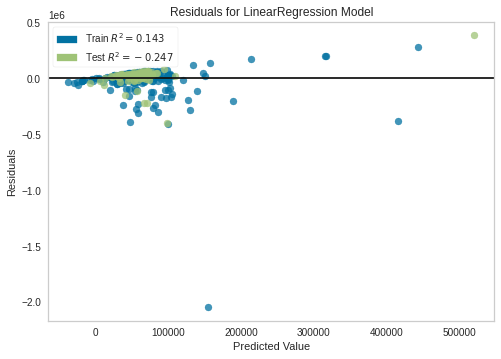

In [14]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model2, hist=False, qqplot=False)
#visualizer = ResidualsPlot(model2)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
visualizer.ax.grid(False)
visualizer.show()  

In [15]:
target.shape

(366,)

ValueError: ignored

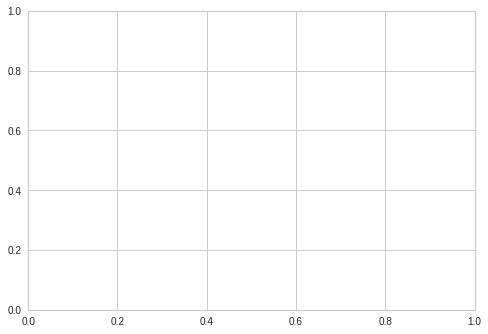

In [16]:
import matplotlib.pyplot as plt
y_predicted=model2.predict(dataset)
r2_score(target, y_predicted)

plt.scatter(dataset, target, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(dataset, y_predicted, color='r')
plt.show()

In [17]:
import plotly.express as px
fig = px.bar(imp, title="Permutation Feature Importance")
fig.update_traces(showlegend=False, marker_color='indianred', selector=dict(type='bar'))
#fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=True)
#fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=True)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True, ticks='inside')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True, ticks='inside')

fig.update_layout( title={'text':"Permutation Feature Importance",
                         'y':0.90,
                         'yanchor': 'top',
                         'x':0.5,
                         'xanchor': 'center'})
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                           'paper_bgcolor': 'rgba(0,0,0,0)'
                  })
fig.update_layout(
    width=600,
    xaxis_title="Employee Features",
    yaxis_title="Employee Count Importance Score",
    font=dict(
        family="Time New",
        size=16,
        color="black"
    )
)

fig.show()

In [18]:
import plotly.express as px
help(px.bar)

Help on function bar in module plotly.express._chart_types:

bar(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, text=None, base=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, pattern_shape_sequence=None, pattern_shape_map=None, range_color=None, color_continuous_midpoint=None, opacity=None, orientation=None, barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, text_auto=False, title=None, template=None, width=None, height=None)
        In a bar plot, each row of `data_frame` is represented as a rectangular
        mark.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        

In [19]:
import plotly.express as px
fig = px.bar(imp)
fig.update_traces(marker_color='darkred',showlegend=False, selector=dict(type='bar'))
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True, ticks='inside')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True, ticks='inside')

fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                           'paper_bgcolor': 'rgba(0,0,0,0)'
                  })
fig.update_layout(
    width=600, bargap=0.3,
    xaxis_title="Employee Features",
    yaxis_title="Employee Count Importance Scores",
    font=dict(
        family="Time New",
        size=16,
        color="black"
    )
)

fig.show()

NameError: ignored

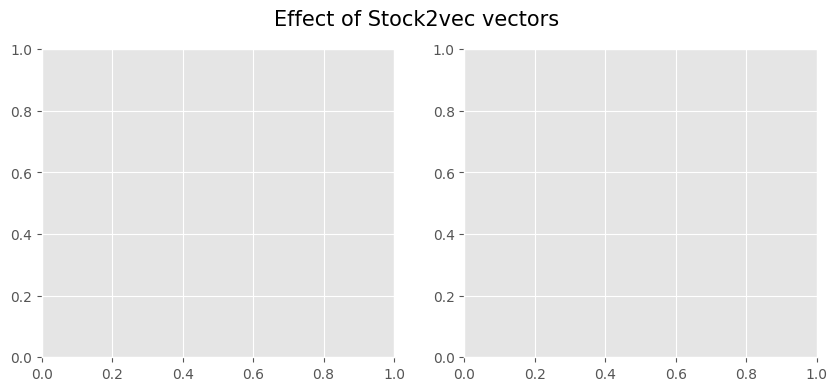

In [20]:
plt.style.use('default')
plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Effect of Stock2vec vectors', fontsize=15)

axes[0].plot(x_pred, response_1, color='k', label='Regression model')
axes[0].scatter(X2, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG data')
axes[0].set_ylabel('ESG rating', fontsize=14)
axes[0].set_xlabel('Vector1', fontsize=14)
axes[0].legend(facecolor='white', fontsize=11, loc='best')
axes[0].set_ylim(0, 60)
axes[0].set_xlim(0, 4)
axes[0].text(0.47, 0.15, '$y = %.1f x_1 + %.1f $' % (model_1.coef_[0], model_1.intercept_),
             fontsize=12, transform=axes[0].transAxes)
axes[0].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[0].transAxes, color='red', alpha=0.5)

axes[1].plot(x_pred3, response_2, color='k', label='Regression model')
axes[1].scatter(X3, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG Data')
axes[1].set_ylabel('ESG rating', fontsize=14)
axes[1].set_xlabel('Earnings per share', fontsize=14)
axes[1].legend(facecolor='white', fontsize=11, loc='best')
axes[1].set_ylim(0, 60)
axes[1].set_xlim(0, 20)
axes[1].text(0.55, 0.15, '$y = %.1f x_1 + %.1f $' % (model_2.coef_[0], model_2.intercept_),
             fontsize=12, transform=axes[1].transAxes)
axes[1].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[1].transAxes, color='red', alpha=0.5)

fig.tight_layout(rect=[0, 0, 1, 0.94])